# Leading Case Club Study

## Problem Statment 

#### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

#### Results Expected

Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
Present the overall approach of the analysis in a presentation: 
Mention the problem statement and the analysis approach briefly 
Explain the results of univariate, bivariate analysis etc. in business terms
Include visualisations and summarise the most important results in the presentation

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math as mt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Step 1 : No of Rows and Columns in excel

In [6]:

print("Columns :",df.shape[1])
print("Rows :",df.shape[0])

Columns : 111
Rows : 39717


### Step 2 : Percentage of missing values in each column

In [7]:
pd.set_option('display.max_rows', None)
df_null_percent=100*df.isnull().mean()
df_null_percent


id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [8]:

print("Columns count that has null values :",len(df_null_percent[df_null_percent!=0]))
print("Columns count that doesnt have null values :",len(df_null_percent[df_null_percent==0]))

Columns count that has null values : 68
Columns count that doesnt have null values : 43


### Step 3 : Columns which contains more that 40% values as null

In [9]:
print("Column that have more than 40% values as null :",len(df_null_percent[df_null_percent>=40]))

Column that have more than 40% values as null : 57


### Step 4 : Columns to be removed as the null value is more than 40 % and the one to be considered

In [10]:

remove_cols=df_null_percent[df_null_percent>=40].index
final_cols=df_null_percent[df_null_percent<40].index


In [11]:
remove_cols

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [12]:
final_cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Observe the data of the below columns

	
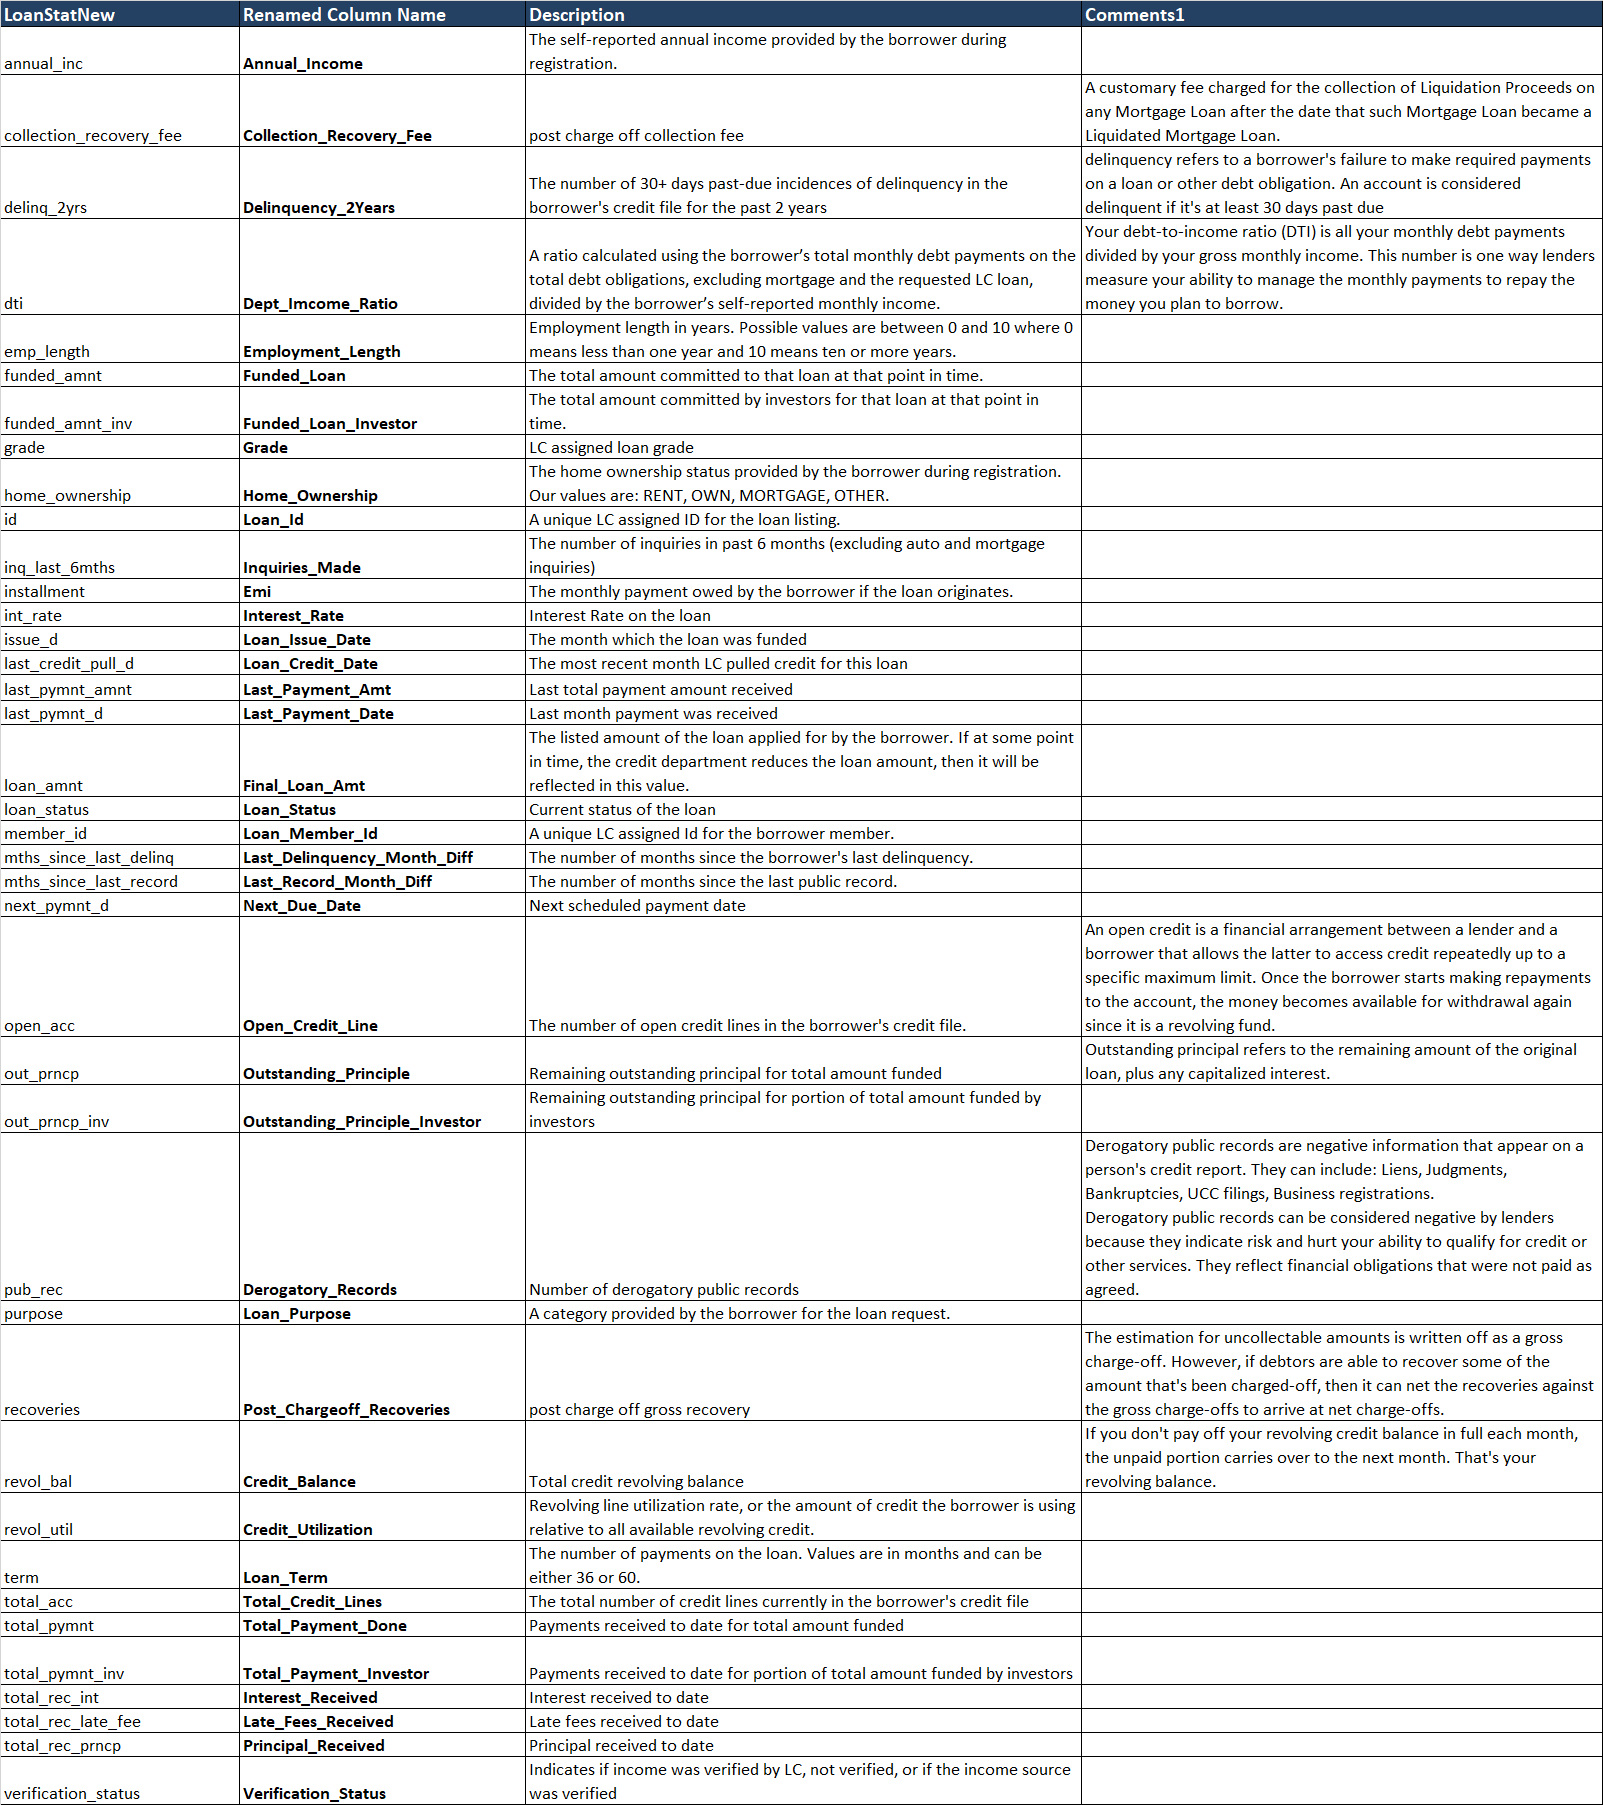

### Step 5 : There are columns that has same value for all row , we can remove that row as well as it will not add any benifit 

In [13]:
### Checking the column type based on the unique value they wave
df[final_cols].nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

##### collections_12_mths_ex_med  
##### policy_code             
##### application_type                  
##### acc_now_delinq                   
##### chargeoff_within_12_mths          
##### delinq_amnt                       
##### tax_liens                         
##### initial_list_status               
##### pymnt_plan                        

In [14]:
print("Columns count before removal",len(final_cols))

Columns count before removal 54


### Step 6 : There are some columns that contains general information not needed for the analysis. Also some columns any contains duplicate data and can be ignored 

In [15]:
#['id', 'member_id','funded_amnt', 'funded_amnt_inv','emp_title','url','desc','title']

Removing : 

    ['collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq',
     'chargeoff_within_12_mths','delinq_amnt','tax_liens','initial_list_status','pymnt_plan','url','desc',
     'id', 'member_id','funded_amnt', 'funded_amnt_inv','emp_title','url','desc','title',
     'initial_list_status','out_prncp_inv','total_pymnt_inv']
     
     

In [16]:
cols_to_remove=['collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq',
     'chargeoff_within_12_mths','delinq_amnt','tax_liens','initial_list_status','pymnt_plan','url','desc',
     'id', 'member_id','funded_amnt', 'funded_amnt_inv','emp_title','url','desc','title','initial_list_status','out_prncp_inv',
     'total_pymnt_inv']

final_cols=list(final_cols)
for x in cols_to_remove:
    if x in final_cols:
        final_cols.remove(x)

print("Columns count after removal ",len(final_cols))

Columns count after removal  35


In [17]:
final_cols

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

### Step 6 : Creating a final dataframe with selected columns

In [18]:
final_df=df[final_cols]

In [19]:
final_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [20]:
final_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,5863.155187,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,3005.666844,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,12231.890000,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,3513.330000,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


## Numerical column --> Mean/Median (Median is always better approach bcoz median is least affected with outliers)
## Categorical column --> Mode/create a new category (Missing)

### Step 7 : Renaming columns for a better understanding

In [21]:
final_df.rename(columns = {
'loan_amnt':'Final_Loan_Amt', 
'term':'Loan_Term', 
'int_rate':'Interest_Rate', 
'installment':'Emi', 
'grade':'Grade', 
'sub_grade':'Sub_Grade', 
'emp_length':'Experience', 
'home_ownership':'Home_Ownership', 
'annual_inc':'Annual_Income', 
'verification_status':'Verification_Status',
'issue_d':'Loan_Issue_Date', 
'loan_status':'Loan_Status', 
'purpose':'Loan_Purpose', 
'zip_code':'Zip_Code',
'addr_state':'State_Code', 
'dti':'Dept_Income_Ratio', 
'delinq_2yrs':'Delinquency_2Years', 
'earliest_cr_line':'First_Credit_Open_Date',
'inq_last_6mths':'Inquiries_Made_6Months', 
'open_acc':'Open_Credit_Line', 
'pub_rec':'Derogatory_Records', 
'revol_bal':'Credit_Balance', 
'revol_util':'Credit_Utiliz',
'total_acc':'Total_Credit_Line', 
'out_prncp':'Outstanding_Principle',
'total_pymnt':'Payment_Done',
'total_rec_prncp':'Total_Principle_Paid', 
'total_rec_int':'Total_Principle_Paid_Investor',
'total_rec_late_fee':'Total_Late_Fees_Paid', 
'recoveries':'Post_Chargeoff_Recovery', 
'collection_recovery_fee':'Chargeoff_Fees',
'last_pymnt_d':'Last_Payment_Date', 
'last_pymnt_amnt':'Last_Payment_Amt', 
'last_credit_pull_d':'Last_Credit_Withdraw_Date',
'pub_rec_bankruptcies':'Total_Backruptcies'
}, inplace = True)

In [22]:
final_df.head()

,Final_Loan_Amt,Loan_Term,Interest_Rate,Emi,Grade,Sub_Grade,Experience,Home_Ownership,Annual_Income,Verification_Status,...,Payment_Done,Total_Principle_Paid,Total_Principle_Paid_Investor,Total_Late_Fees_Paid,Post_Chargeoff_Recovery,Chargeoff_Fees,Last_Payment_Date,Last_Payment_Amt,Last_Credit_Withdraw_Date,Total_Backruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,5863.155187,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,3005.666844,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,12231.890000,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,3513.330000,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Step  8 : Data Cleaning Exercise

#### Case 1: Total_Backruptcies : Here we can check if the loan status is charged off then we can add 1 here else 0 for Fully Paid


In [23]:
100*final_df['Total_Backruptcies'].isnull().mean()

1.7549160309187504

In [24]:
def check_loan_Status(loanstatus,backrupties):
    if mt.isnan(backrupties):
        if loanstatus=="Charged Off":
            return 1
        else:
            return 0
    else:
        return backrupties
    
final_df['Total_Backruptcies'] = [ check_loan_Status(row["Loan_Status"],row['Total_Backruptcies']) for index, row in final_df.iterrows()]

In [25]:
100*final_df['Total_Backruptcies'].isnull().mean()

0.0

#### Case 2: Removing [> < +  years year] terms from Experience Column


In [26]:
final_df['Experience']= final_df['Experience'].str.replace('>', '')
final_df['Experience']= final_df['Experience'].str.replace('<', '')
final_df['Experience']= final_df['Experience'].str.replace('+', '')
final_df['Experience']= final_df['Experience'].str.replace('years', '')
final_df['Experience']= final_df['Experience'].str.replace('year', '')
final_df['Experience']= final_df['Experience'].str.replace(' ', '')

In [27]:
final_df['Experience'].head()

0    10
1     1
2    10
3    10
4     1
Name: Experience, dtype: object

#### Case 3: Rounding decimal values to 2 decimal places


In [28]:
#Final_Loan_Amt , Funded_Loan , Funded_Loan_Investor , Payment_Done , Payment_Done_Investor , Total_Late_Fees_Paid
#Converting the above columns value to nearest to 2 decimal places

final_df['Final_Loan_Amt'] =round(final_df['Final_Loan_Amt'], 2)
final_df['Funded_Loan'] =round(final_df['Final_Loan_Amt'], 2)
final_df['Payment_Done'] =round(final_df['Final_Loan_Amt'], 2)
final_df['Total_Late_Fees_Paid'] =round(final_df['Final_Loan_Amt'], 2)

In [29]:
final_df.head(20)

,Final_Loan_Amt,Loan_Term,Interest_Rate,Emi,Grade,Sub_Grade,Experience,Home_Ownership,Annual_Income,Verification_Status,...,Total_Principle_Paid,Total_Principle_Paid_Investor,Total_Late_Fees_Paid,Post_Chargeoff_Recovery,Chargeoff_Fees,Last_Payment_Date,Last_Payment_Amt,Last_Credit_Withdraw_Date,Total_Backruptcies,Funded_Loan
0,5000,36 months,10.65%,162.87,B,B2,10,RENT,24000.00,Verified,...,5000.00,863.16,5000,0.00,0.0000,Jan-15,171.62,May-16,0.0,5000
1,2500,60 months,15.27%,59.83,C,C4,1,RENT,30000.00,Source Verified,...,456.46,435.17,2500,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,2500
2,2400,36 months,15.96%,84.33,C,C5,10,RENT,12252.00,Not Verified,...,2400.00,605.67,2400,0.00,0.0000,Jun-14,649.91,May-16,0.0,2400
3,10000,36 months,13.49%,339.31,C,C1,10,RENT,49200.00,Source Verified,...,10000.00,2214.92,10000,0.00,0.0000,Jan-15,357.48,Apr-16,0.0,10000
4,3000,60 months,12.69%,67.79,B,B5,1,RENT,80000.00,Source Verified,...,2475.94,1037.39,3000,0.00,0.0000,May-16,67.79,May-16,0.0,3000
5,5000,36 months,7.90%,156.46,A,A4,3,RENT,36000.00,Source Verified,...,5000.00,632.21,5000,0.00,0.0000,Jan-15,161.03,Jan-16,0.0,5000
6,7000,60 months,15.96%,170.08,C,C5,8,RENT,47004.00,Not Verified,...,6985.61,3125.23,7000,0.00,0.0000,May-16,1313.76,May-16,0.0,7000
7,3000,36 months,18.64%,109.43,E,E1,9,RENT,48000.00,Source Verified,...,3000.00,939.14,3000,0.00,0.0000,Jan-15,111.34,Dec-14,0.0,3000
8,5600,60 months,21.28%,152.39,F,F2,4,OWN,40000.00,Source Verified,...,162.02,294.94,5600,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,5600
9,5375,60 months,12.69%,121.45,B,B5,1,RENT,15000.00,Verified,...,673.48,533.42,5375,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,5375


#### Case 4: Removing % symbol from Interest_Rate , Credit_Utiliz

In [30]:
final_df['Interest_Rate']=final_df['Interest_Rate'].str.replace('%', '')
final_df['Credit_Utiliz']=final_df['Credit_Utiliz'].str.replace('%', '')

In [31]:
final_df['Interest_Rate'].head(20)

0     10.65
1     15.27
2     15.96
3     13.49
4     12.69
5      7.90
6     15.96
7     18.64
8     21.28
9     12.69
10    14.65
11    12.69
12    13.49
13     9.91
14    10.65
15    16.29
16    15.27
17     6.03
18    11.71
19     6.03
Name: Interest_Rate, dtype: object

In [32]:
100*final_df.isnull().mean()

Final_Loan_Amt                   0.000000
Loan_Term                        0.000000
Interest_Rate                    0.000000
Emi                              0.000000
Grade                            0.000000
Sub_Grade                        0.000000
Experience                       2.706650
Home_Ownership                   0.000000
Annual_Income                    0.000000
Verification_Status              0.000000
Loan_Issue_Date                  0.000000
Loan_Status                      0.000000
Loan_Purpose                     0.000000
Zip_Code                         0.000000
State_Code                       0.000000
Dept_Income_Ratio                0.000000
Delinquency_2Years               0.000000
First_Credit_Open_Date           0.000000
Inquiries_Made_6Months           0.000000
Open_Credit_Line                 0.000000
Derogatory_Records               0.000000
Credit_Balance                   0.000000
Credit_Utiliz                    0.125891
Total_Credit_Line                0

#### Case 5: Replacing n/a with proper text NotApplicable for column "Experience"

In [33]:
def replaceExp(exp_year):
    if exp_year=="n/a" or exp_year is None:
        return "NotApplicable"
    else:
        return exp_year

final_df["Experience"]=[ replaceExp(row["Experience"]) for index, row in final_df.iterrows()]

#### Case 6: Replacing NaN or blank columns of Credit_Utiliz with 0 . If you see that in the data souce few of the columns are havning blacnk value. We can presume that for few cases the consumer has take the loan for the first time and has not started using it .


In [34]:
final_df[final_df["Credit_Utiliz"].isna()]["Credit_Utiliz"]="0"

In [35]:
100*final_df.isnull().mean()

Final_Loan_Amt                   0.000000
Loan_Term                        0.000000
Interest_Rate                    0.000000
Emi                              0.000000
Grade                            0.000000
Sub_Grade                        0.000000
Experience                       2.706650
Home_Ownership                   0.000000
Annual_Income                    0.000000
Verification_Status              0.000000
Loan_Issue_Date                  0.000000
Loan_Status                      0.000000
Loan_Purpose                     0.000000
Zip_Code                         0.000000
State_Code                       0.000000
Dept_Income_Ratio                0.000000
Delinquency_2Years               0.000000
First_Credit_Open_Date           0.000000
Inquiries_Made_6Months           0.000000
Open_Credit_Line                 0.000000
Derogatory_Records               0.000000
Credit_Balance                   0.000000
Credit_Utiliz                    0.125891
Total_Credit_Line                0

### Step  9 : Column Segmentation Based On Data Type

In [36]:
final_df.nunique()

Final_Loan_Amt                     885
Loan_Term                            2
Interest_Rate                      371
Emi                              15383
Grade                                7
Sub_Grade                           35
Experience                          10
Home_Ownership                       5
Annual_Income                     5318
Verification_Status                  3
Loan_Issue_Date                     55
Loan_Status                          3
Loan_Purpose                        14
Zip_Code                           823
State_Code                          50
Dept_Income_Ratio                 2868
Delinquency_2Years                  11
First_Credit_Open_Date             526
Inquiries_Made_6Months               9
Open_Credit_Line                    40
Derogatory_Records                   5
Credit_Balance                   21711
Credit_Utiliz                     1089
Total_Credit_Line                   82
Outstanding_Principle             1137
Payment_Done             

In [37]:
category_cols=["Loan_Term","Grade","Sub_Grade","Experience","Home_Ownership","Verification_Status","Loan_Status",
               "Loan_Purpose","State_Code"]

date_cols = ["Loan_Issue_Date","First_Credit_Open_Date","Last_Payment_Date","Last_Credit_Withdraw_Date"]

contineous_cols=["Final_Loan_Amt","Funded_Loan","Interest_Rate","Emi","Annual_Income","Zip_Code","Dept_Income_Ratio",
                 "Delinquency_2Years","Inquiries_Made_6Months","Open_Credit_Line","Derogatory_Records","Credit_Balance",
                 "Credit_Utiliz","Total_Credit_Line","Outstanding_Principle","Payment_Done","Total_Principle_Paid",
                 "Total_Late_Fees_Paid","Post_Chargeoff_Recovery","Chargeoff_Fees","Last_Payment_Amt","Total_Backruptcies"]

### Step  10 : Univariant Analysis

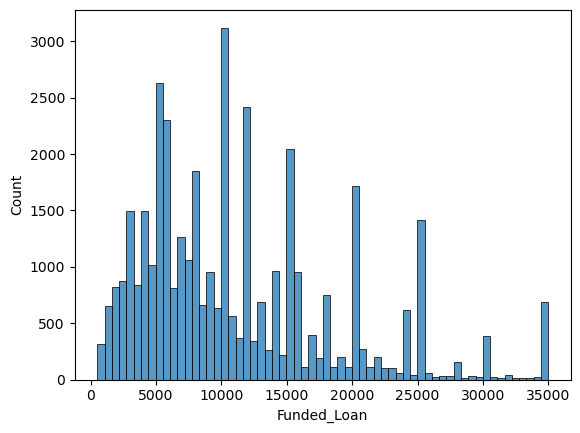

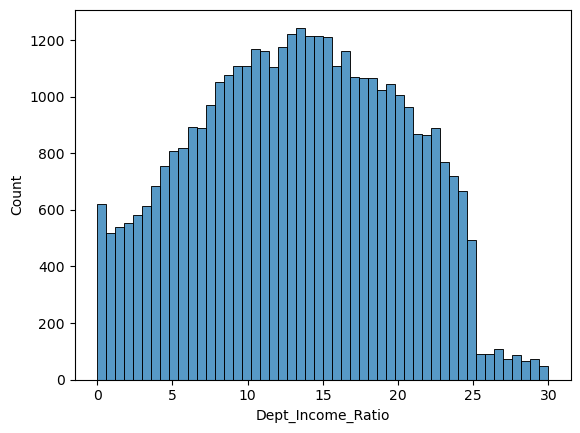

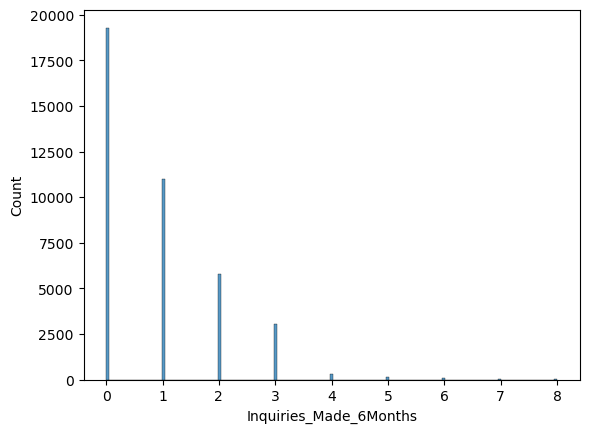

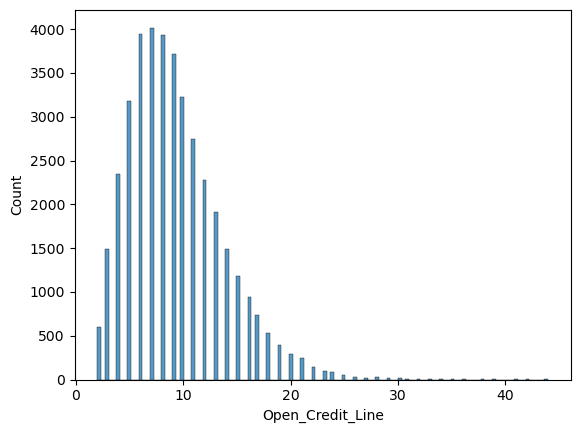

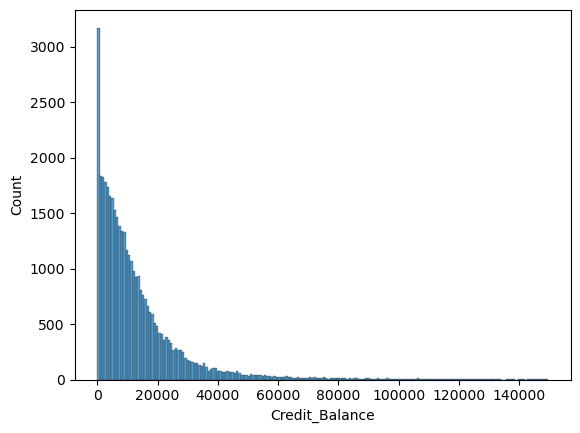

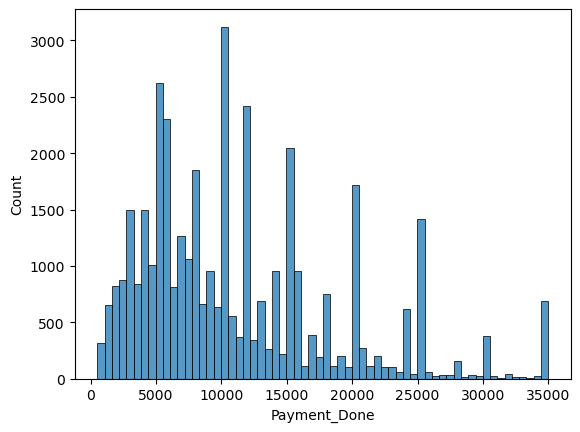

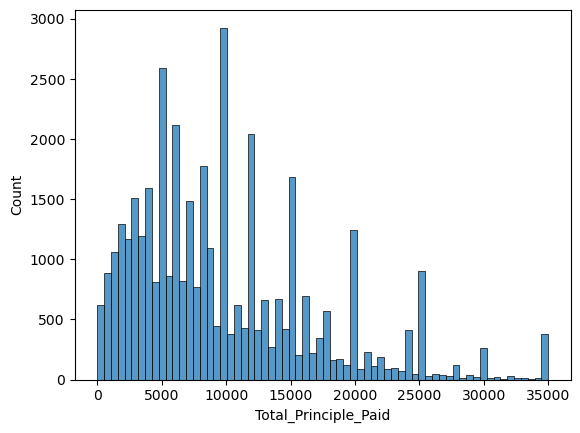

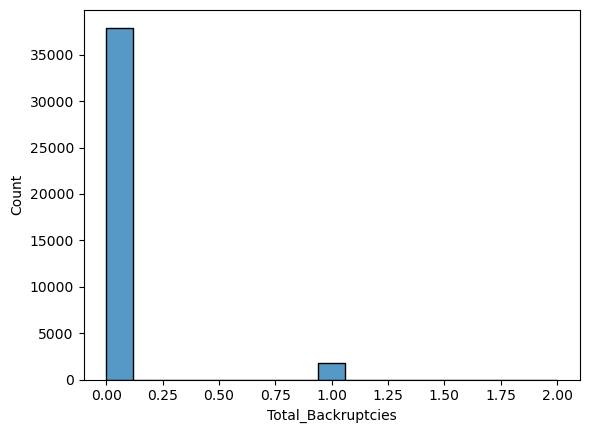

In [38]:
#univariant analysis of specific columns
for col1 in ["Funded_Loan","Dept_Income_Ratio","Inquiries_Made_6Months","Open_Credit_Line","Credit_Balance",
             "Payment_Done","Total_Principle_Paid","Total_Backruptcies"]:
    sns.histplot(final_df[col1])
    plt.show()

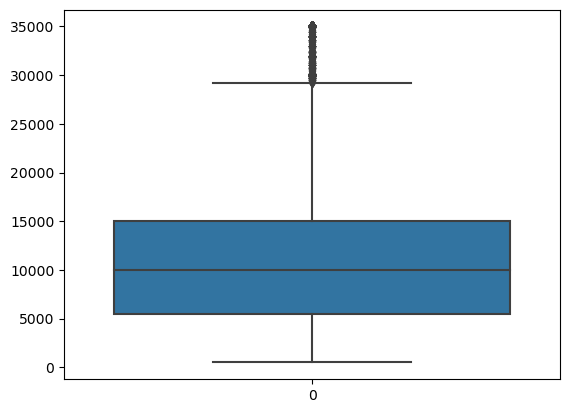

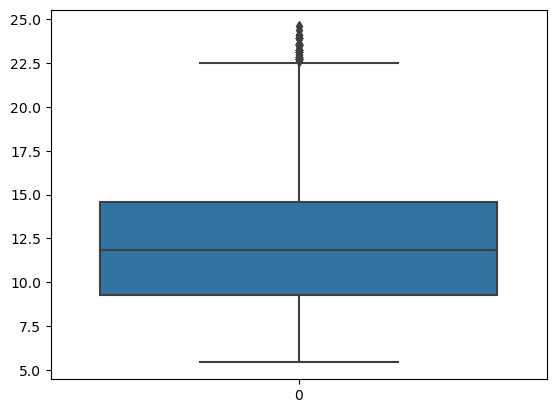

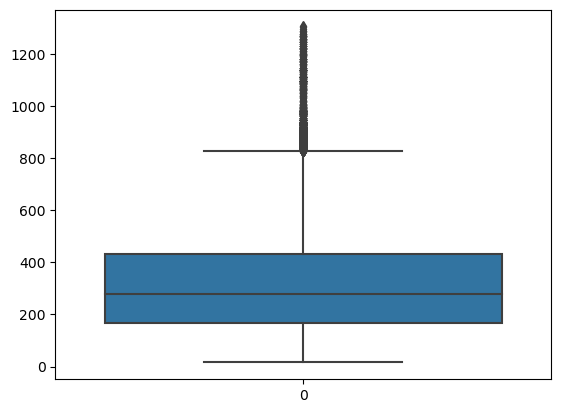

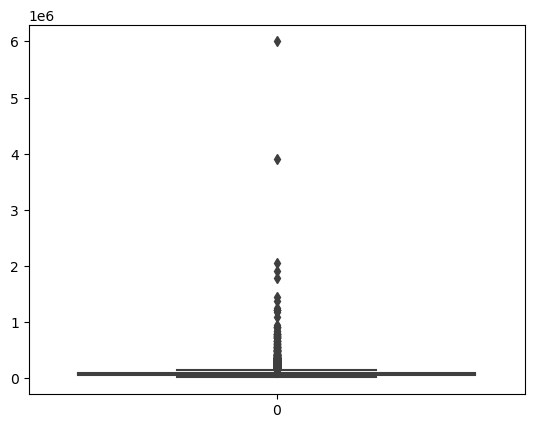

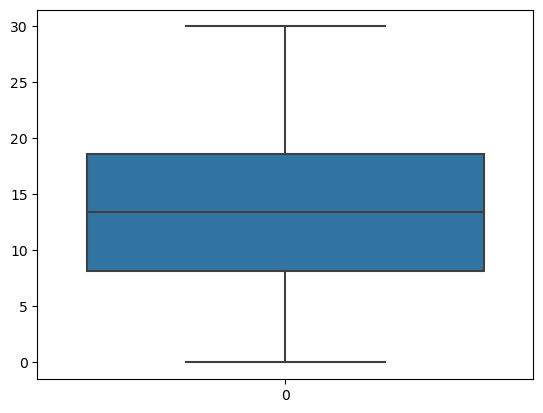

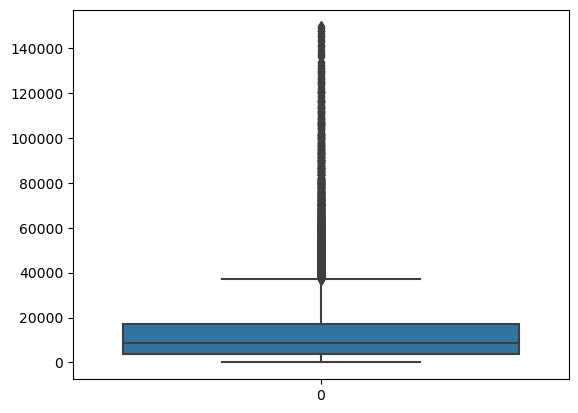

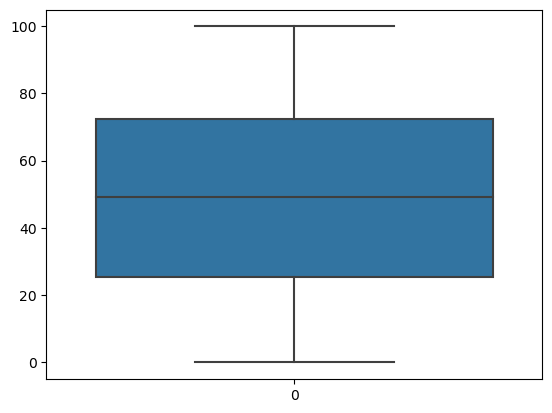

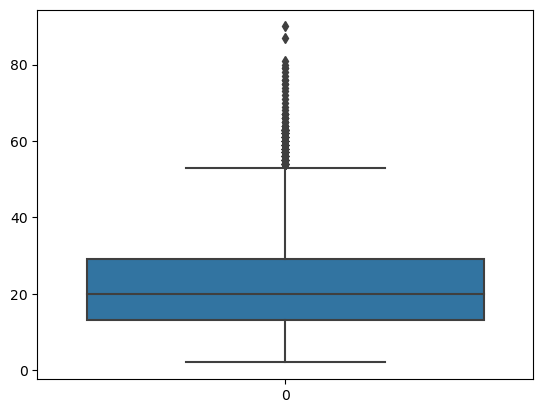

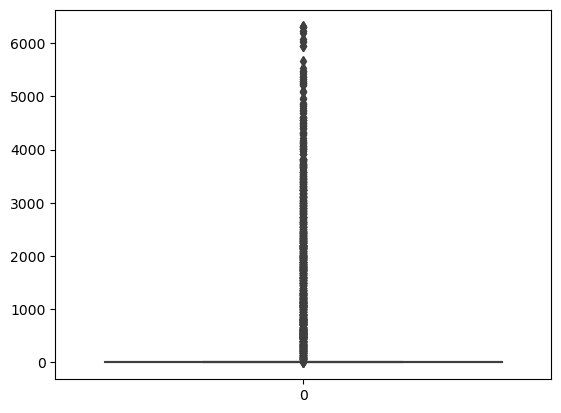

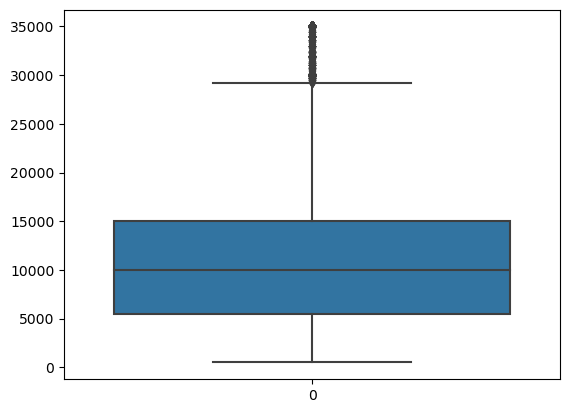

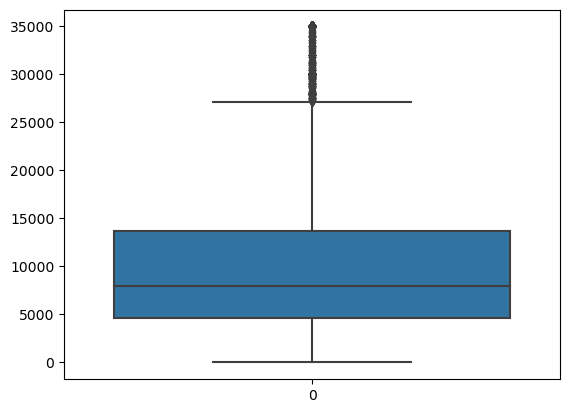

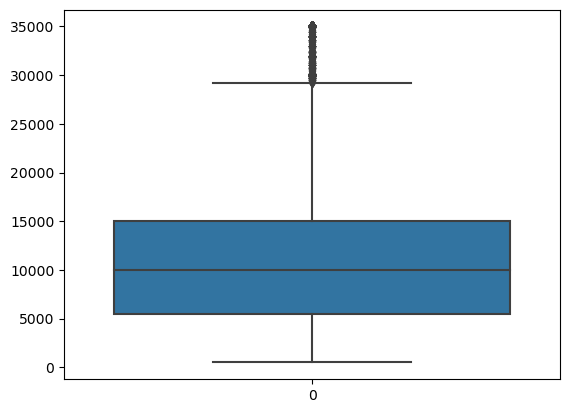

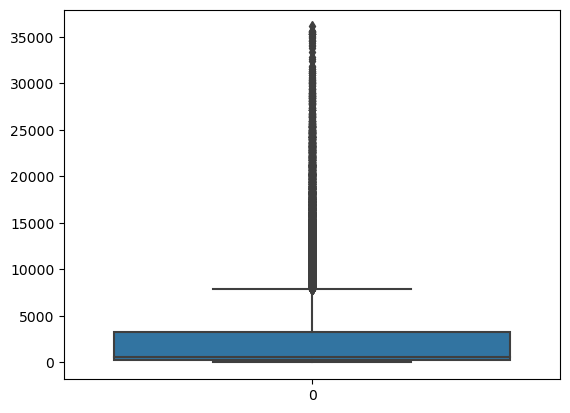

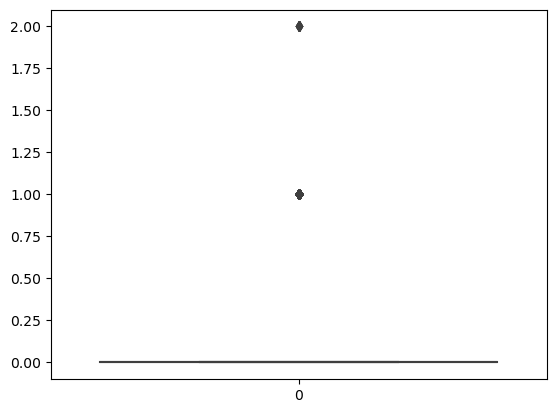

In [39]:
#generally the outlier is checked in the contineous data column of the data set. We will be using boxplot to find the outlier information 
box_cols=["Funded_Loan","Interest_Rate","Emi","Annual_Income","Dept_Income_Ratio",
          "Credit_Balance","Credit_Utiliz","Total_Credit_Line","Outstanding_Principle","Payment_Done",
          "Total_Principle_Paid","Total_Late_Fees_Paid","Last_Payment_Amt","Total_Backruptcies"]
for col1 in box_cols:
    sns.boxplot(final_df[col1])
    plt.show()

### Step  11 : Categogical Data

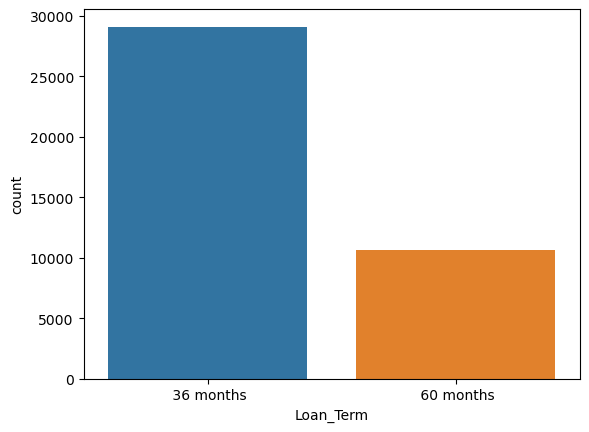

<Figure size 2000x600 with 0 Axes>

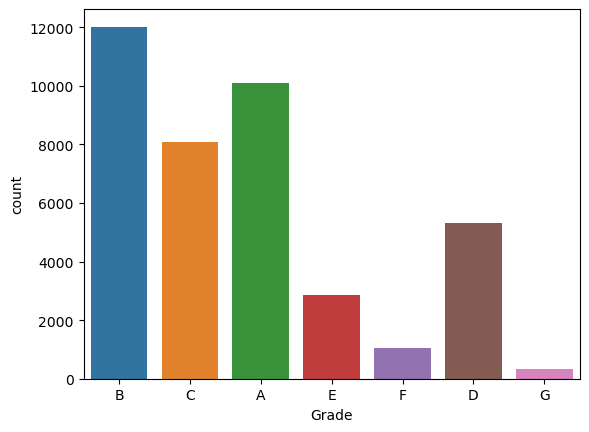

<Figure size 2000x600 with 0 Axes>

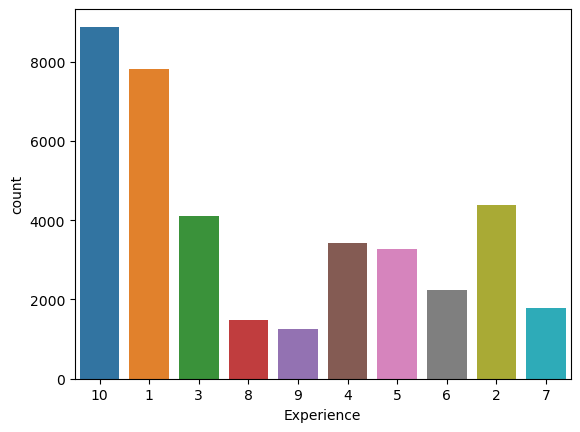

<Figure size 2000x600 with 0 Axes>

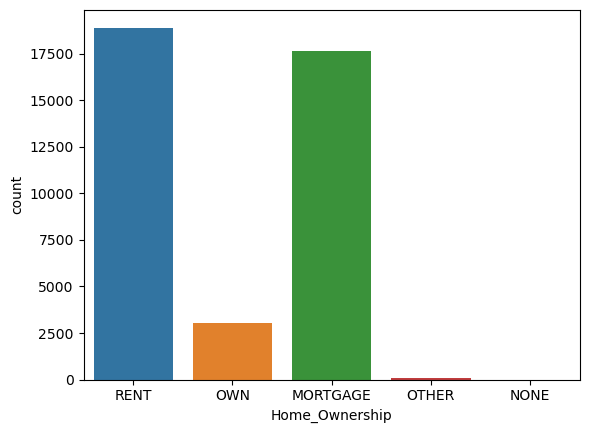

<Figure size 2000x600 with 0 Axes>

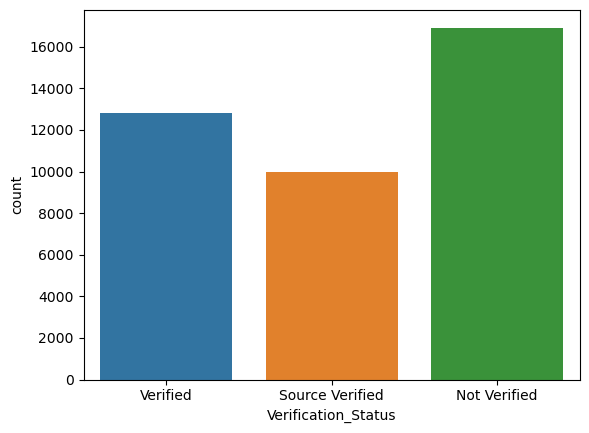

<Figure size 2000x600 with 0 Axes>

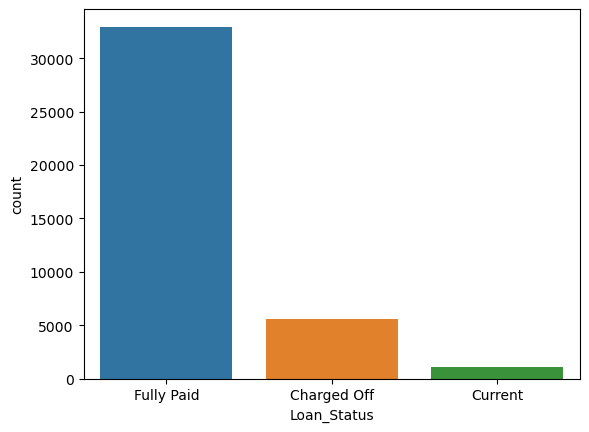

<Figure size 2000x600 with 0 Axes>

In [40]:
for col in ["Loan_Term","Grade","Experience","Home_Ownership","Verification_Status","Loan_Status"]:
    sns.countplot(x=final_df[col])
    plt.figure(figsize=(20,6))
    plt.show()

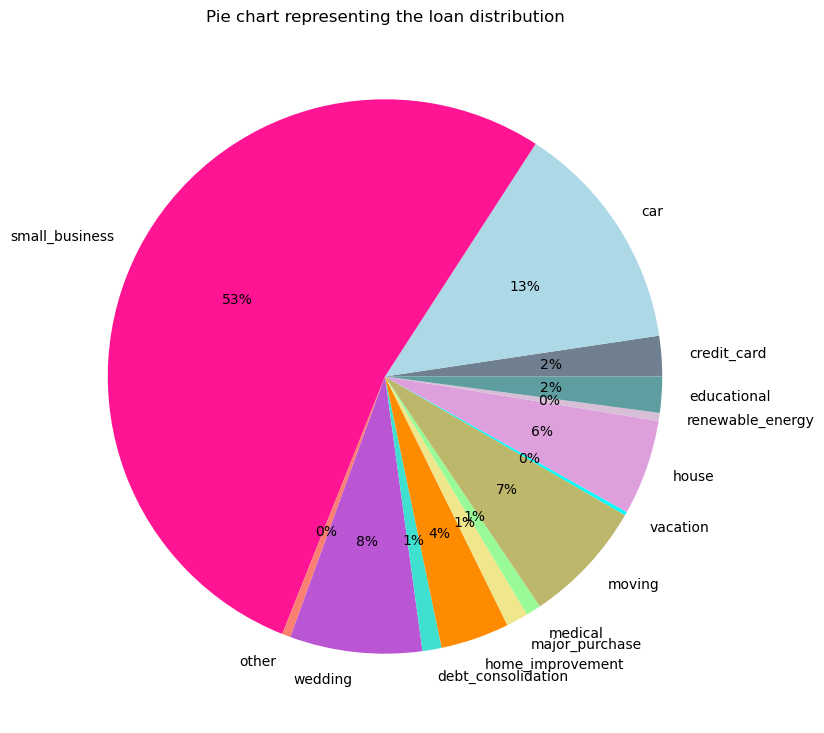

In [41]:
x=list(final_df.groupby('Loan_Purpose').sum()["Final_Loan_Amt"])
labs=list(final_df["Loan_Purpose"].unique())
fig, ax = plt.subplots(figsize=(25, 9))


colors = ['slategrey', 'lightblue','deeppink', 'salmon', 'mediumorchid', 'turquoise','darkorange','khaki', 'palegreen','darkkhaki','cyan','plum','thistle','cadetblue','pink','olive','yellow']

ax.pie(x, labels=labs, autopct='%.0f%%', colors = colors)
ax.set_title("Pie chart representing the loan distribution")
plt.xticks(rotation=90)
plt.show();

#### Step 11: Numerical Vs Categorical Graph

In [42]:
loan_dist_count=final_df.groupby(['Loan_Purpose']).count()
loan_dist_count["Final_Loan_Amt"]

Loan_Purpose
car                    1549
credit_card            5130
debt_consolidation    18641
educational             325
home_improvement       2976
house                   381
major_purchase         2187
medical                 693
moving                  583
other                  3993
renewable_energy        103
small_business         1828
vacation                381
wedding                 947
Name: Final_Loan_Amt, dtype: int64

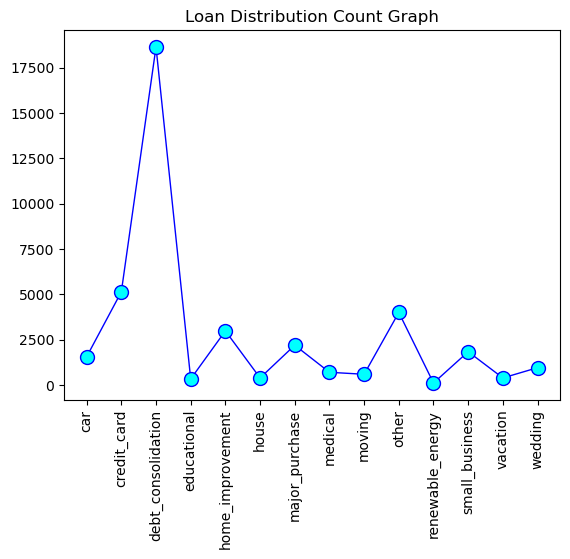

In [43]:
ax = plt.plot(loan_dist_count["Final_Loan_Amt"], 'b-o', lw = 1, markersize = 10,  markerfacecolor='cyan')
plt.title("Loan Distribution Count Graph")
plt.xticks(rotation=90)
plt.show()

In [44]:
loan_dist_amt=final_df.groupby(['Loan_Purpose']).sum()
loan_dist_amt["Final_Loan_Amt"]

Loan_Purpose
car                    10498375
credit_card            60142150
debt_consolidation    236647300
educational             2213400
home_improvement       34334725
house                   4980050
major_purchase         17835925
medical                 5726725
moving                  3877050
other                  32213975
renewable_energy         897875
small_business         24800975
vacation                2081525
wedding                 9352600
Name: Final_Loan_Amt, dtype: int64

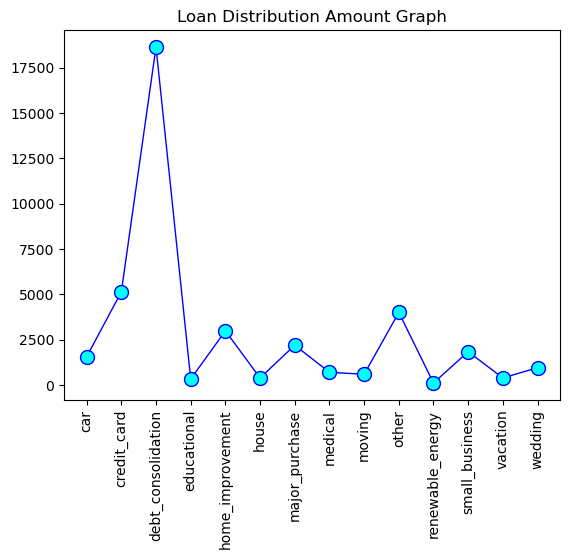

In [45]:
ax = plt.plot(loan_dist_count["Final_Loan_Amt"], 'b-o', lw = 1, markersize = 10,  markerfacecolor='cyan')
plt.title("Loan Distribution Amount Graph")
plt.xticks(rotation=90)
plt.show()

In [46]:
final_df.groupby(['Experience','Loan_Status']).sum()["Final_Loan_Amt"]

Experience  Loan_Status
1           Charged Off    11449075
            Current         2188050
            Fully Paid     63571325
10          Charged Off    19425225
            Current         7510700
            Fully Paid     89289925
2           Charged Off     6088500
            Current         1586825
            Fully Paid     37355975
3           Charged Off     6330050
            Current         1298625
            Fully Paid     36344575
4           Charged Off     5323350
            Current         1493325
            Fully Paid     30901700
5           Charged Off     5516350
            Current         1545675
            Fully Paid     29982025
6           Charged Off     3857025
            Current          966675
            Fully Paid     20798550
7           Charged Off     3391375
            Current         1026225
            Fully Paid     16396525
8           Charged Off     2649325
            Current          733225
            Fully Paid     14199800
9   

In [47]:
final_df.groupby(['Annual_Income','Loan_Status']).sum()["Final_Loan_Amt"]

Annual_Income  Loan_Status
4000.00        Fully Paid         2000
4080.00        Charged Off        1400
4200.00        Fully Paid         3950
4800.00        Charged Off        1200
               Fully Paid         6200
4888.00        Fully Paid         1400
5000.00        Fully Paid         1000
5500.00        Fully Paid         1000
6000.00        Charged Off        4250
               Fully Paid         3950
7000.00        Fully Paid         1000
7200.00        Fully Paid         8950
7500.00        Fully Paid         1200
7800.00        Fully Paid         1000
7904.04        Fully Paid          500
8000.00        Charged Off        5500
               Fully Paid        19050
8004.00        Fully Paid         3000
8088.00        Fully Paid         3800
8280.00        Fully Paid         2400
8400.00        Fully Paid        11400
8412.00        Charged Off        2500
8472.00        Fully Paid         3000
8500.00        Fully Paid         4500
8628.00        Fully Paid         390

In [48]:
final_df.groupby(['Dept_Income_Ratio','Loan_Status']).sum()["Final_Loan_Amt"]

Dept_Income_Ratio  Loan_Status
0.00               Charged Off     182350
                   Current          81000
                   Fully Paid     1165725
0.01               Charged Off      15000
                   Fully Paid       15000
0.02               Fully Paid       88500
0.03               Fully Paid       17925
0.04               Fully Paid       38600
0.05               Fully Paid       14200
0.06               Fully Paid       25000
0.07               Fully Paid       65500
0.08               Charged Off      10000
                   Fully Paid       49250
0.09               Current          24000
                   Fully Paid       15500
0.11               Fully Paid       56500
0.12               Fully Paid       22600
0.13               Charged Off      25000
                   Fully Paid      159450
0.14               Charged Off       7100
                   Fully Paid       50000
0.15               Fully Paid       78750
0.16               Fully Paid       75000
0.1

## Add a new column Income_Category 

In [49]:

income_category = pd.cut(final_df.Annual_Income,bins=[0,1000000,2000000,3000000,4000000,5000000,6000000],
                         labels=['Cat10Lakhs','Cat20Lakhs','Cat30Lakhs','Cat40Lakhs','Cat50Lakhs','Cat60Lakhs'])
final_df.insert(7,'Income_Category',income_category)

In [50]:
final_df.groupby(['Income_Category','Loan_Status']).sum()["Final_Loan_Amt"]

Income_Category  Loan_Status
Cat10Lakhs       Charged Off     68095600
                 Current         19441550
                 Fully Paid     357917650
Cat20Lakhs       Charged Off        15775
                 Current                0
                 Fully Paid         93625
Cat30Lakhs       Charged Off            0
                 Current                0
                 Fully Paid          8450
Cat40Lakhs       Charged Off            0
                 Current                0
                 Fully Paid         25000
Cat50Lakhs       Charged Off            0
                 Current                0
                 Fully Paid             0
Cat60Lakhs       Charged Off            0
                 Current                0
                 Fully Paid          5000
Name: Final_Loan_Amt, dtype: int64

## Add a new column Loan_Category 

In [51]:
loan_category = pd.cut(final_df.Final_Loan_Amt,bins=[0,1000,5000,10000,20000,30000,40000],
                         labels=['LessThan1K','Amt5K','Amt10K','Amt20K','Amt30','Above30K'])
final_df.insert(7,'Loan_Category',loan_category)

In [52]:
final_df.groupby(['Loan_Category','Loan_Status']).sum()["Final_Loan_Amt"]

Loan_Category  Loan_Status
LessThan1K     Charged Off        46900
               Current             3000
               Fully Paid        259325
Amt5K          Charged Off      4516475
               Current           352150
               Fully Paid      28396150
Amt10K         Charged Off     13069400
               Current          1209450
               Fully Paid      87955775
Amt20K         Charged Off     27330050
               Current          8389850
               Fully Paid     151657775
Amt30          Charged Off     16933275
               Current          6271825
               Fully Paid      70609725
Above30K       Charged Off      6215275
               Current          3215275
               Fully Paid      19170975
Name: Final_Loan_Amt, dtype: int64

## Graph Comparision For Loan_Status value Charged Off

### We will analysis the factor and will try to find out the patern which can be relate to loan charge off. 

In [53]:
Select_df=final_df[final_df["Loan_Status"]=="Charged Off"]

In [54]:
Select_df.groupby(['Loan_Purpose']).count()["Final_Loan_Amt"]

Loan_Purpose
car                    160
credit_card            542
debt_consolidation    2767
educational             56
home_improvement       347
house                   59
major_purchase         222
medical                106
moving                  92
other                  633
renewable_energy        19
small_business         475
vacation                53
wedding                 96
Name: Final_Loan_Amt, dtype: int64

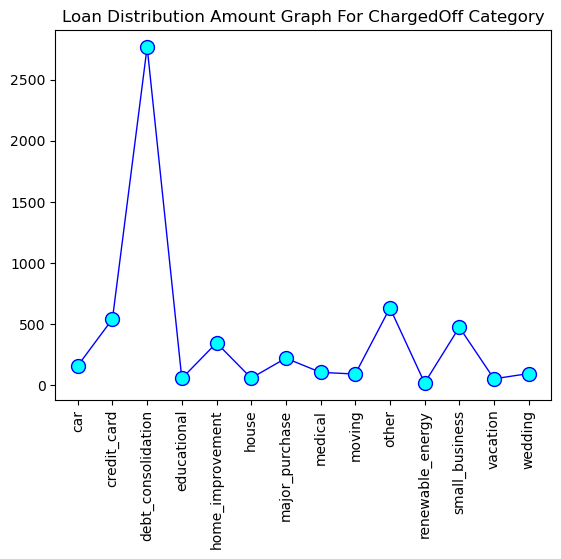

In [55]:
dist_amt_chargeoff=Select_df.groupby(['Loan_Purpose']).count()

ax = plt.plot(dist_amt_chargeoff["Final_Loan_Amt"], 'b-o', lw = 1, markersize = 10,  markerfacecolor='cyan')
plt.title("Loan Distribution Amount Graph For ChargedOff Category")
plt.xticks(rotation=90)
plt.show()

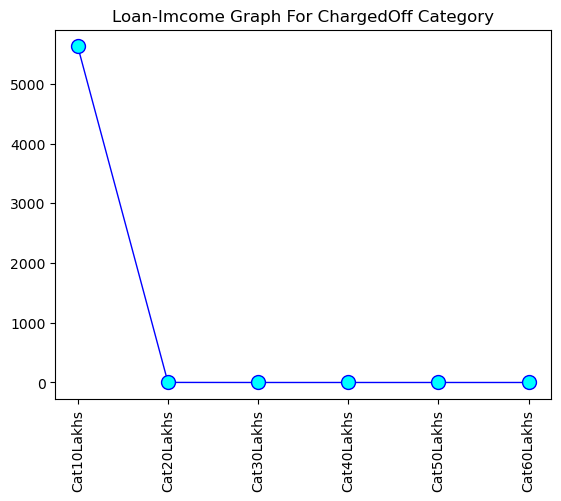

In [56]:
income_amount_chargeoff=Select_df.groupby(['Income_Category']).count()

ax = plt.plot(income_amount_chargeoff["Final_Loan_Amt"], 'b-o', lw = 1, markersize = 10,  markerfacecolor='cyan')
plt.title("Loan-Imcome Graph For ChargedOff Category")
plt.xticks(rotation=90)
plt.show()

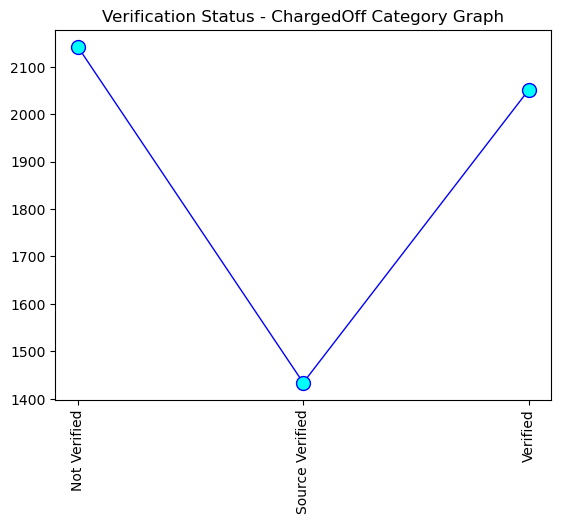

In [57]:
income_amount_chargeoff=Select_df.groupby(['Verification_Status']).count()

ax = plt.plot(income_amount_chargeoff["Final_Loan_Amt"], 'b-o', lw = 1, markersize = 10,  markerfacecolor='cyan')
plt.title("Verification Status - ChargedOff Category Graph")
plt.xticks(rotation=90)
plt.show()

## Graph Comparision For Loan_Status value Fully Paid

### Here we will check which cateogry loans are paid the most 

In [58]:
fully_paid_df=final_df[final_df["Loan_Status"]=="Fully Paid"]

In [59]:
Select_df.groupby(['Loan_Purpose']).sum()["Final_Loan_Amt"]

Loan_Purpose
car                    1162275
credit_card            7054100
debt_consolidation    37404100
educational             440100
home_improvement       4134050
house                   745775
major_purchase         2027975
medical                 908250
moving                  546125
other                  5244325
renewable_energy        160000
small_business         6937325
vacation                311425
wedding                1035550
Name: Final_Loan_Amt, dtype: int64

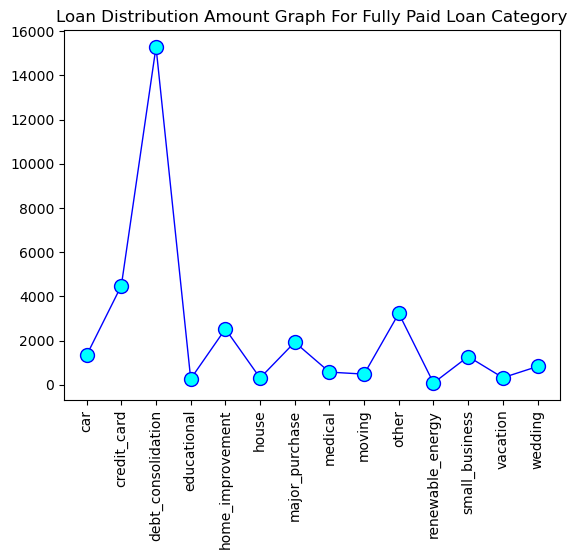

In [60]:
check1=fully_paid_df.groupby(['Loan_Purpose']).count()

ax = plt.plot(check1["Final_Loan_Amt"], 'b-o', lw = 1, markersize = 10,  markerfacecolor='cyan')
plt.title("Loan Distribution Amount Graph For Fully Paid Loan Category")
plt.xticks(rotation=90)
plt.show()

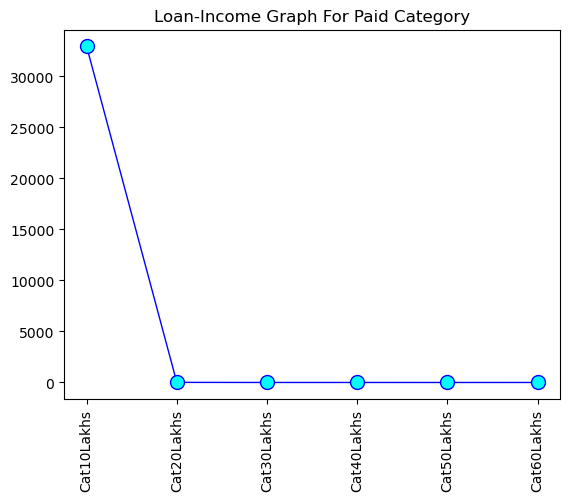

In [61]:
check2=fully_paid_df.groupby(['Income_Category']).count()

ax = plt.plot(check2["Final_Loan_Amt"], 'b-o', lw = 1, markersize = 10,  markerfacecolor='cyan')
plt.title("Loan-Income Graph For Paid Category")
plt.xticks(rotation=90)
plt.show()

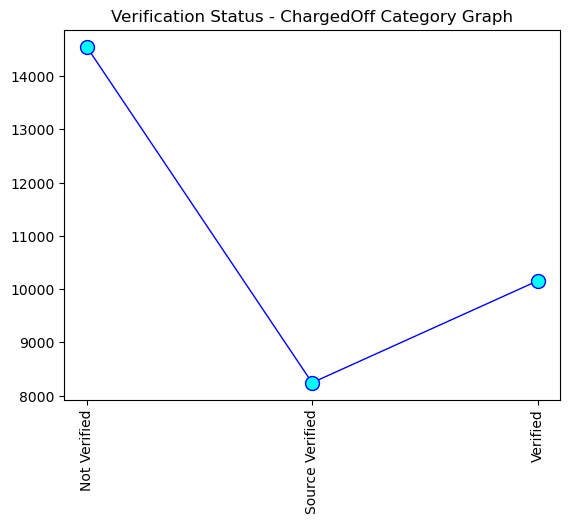

In [62]:
check3=fully_paid_df.groupby(['Verification_Status']).count()

ax = plt.plot(check3["Final_Loan_Amt"], 'b-o', lw = 1, markersize = 10,  markerfacecolor='cyan')
plt.title("Verification Status - ChargedOff Category Graph")
plt.xticks(rotation=90)
plt.show()

In [63]:
#final_df_corr=final_df[["Income_Category","Loan_Category","Loan_Status","Verification_Status"]]
final_df_corr=final_df[["Income_Category","Loan_Category","Loan_Status","Verification_Status","Interest_Rate","Experience","Annual_Income","Total_Backruptcies"]].groupby(["Income_Category","Loan_Category","Loan_Status"]).count()
final_df_corr


Verification_Status  Interest_Rate  \
Income_Category Loan_Category Loan_Status                                       
Cat10Lakhs      LessThan1K    Charged Off                   47             47   
                              Current                        3              3   
                              Fully Paid                   263            263   
                Amt5K         Charged Off                 1267           1267   
                              Current                       93             93   
                              Fully Paid                  7892           7892   
                Amt10K        Charged Off                 1642           1642   
                              Current                      158            158   
                              Fully Paid                 11154          11154   
                Amt20K        Charged Off                 1805           1805   
                              Current                      545            545   
                              Fully Paid                 10224          10224   
                Amt30         Charged Off                  685            685   
                              Current                      248            248   
                              Fully Paid                  2849           2849   
                Above30K      Charged Off                  180            180   
                              Current                       93             93   
                              Fully Paid                   555            555   
Cat20Lakhs      LessThan1K    Charged Off                    0              0   
                              Current                        0              0   
                              Fully Paid                     0              0   
                Amt5K         Charged Off                    0              0   
                              Current                        0              0   
                              Fully Paid                     2              2   
                Amt10K        Charged Off                    0              0   
                              Current                        0              0   
                              Fully Paid                     5              5   
                Amt20K        Charged Off                    1              1   
                              Current                        0              0   
                              Fully Paid                     2              2   
                Amt30         Charged Off                    0              0   
                              Current                        0              0   
                              Fully Paid                     1              1   
                Above30K      Charged Off                    0              0   
                              Current                        0              0   
                              Fully Paid                     0              0   
Cat30Lakhs      LessThan1K    Charged Off                    0              0   
                              Current                        0              0   
                              Fully Paid                     0              0   
                Amt5K         Charged Off                    0              0   
                              Current                        0              0   
                              Fully Paid                     0              0   
                Amt10K        Charged Off                    0              0   
                              Current                        0              0   
                              Fully Paid                     1              1   
                Amt20K        Charged Off                    0              0   
                              Current                        0              0   
                              Fully Paid                     0            

In [64]:
final_df_corr.corr(method='pearson', min_periods=1)

,Verification_Status,Interest_Rate,Experience,Annual_Income,Total_Backruptcies
Verification_Status,1.000000,1.000000,0.999952,1.000000,1.000000
Interest_Rate,1.000000,1.000000,0.999952,1.000000,1.000000
Experience,0.999952,0.999952,1.000000,0.999952,0.999952
Annual_Income,1.000000,1.000000,0.999952,1.000000,1.000000
Total_Backruptcies,1.000000,1.000000,0.999952,1.000000,1.000000


## Finding the relation between Loan status and home ownership

In [65]:
final_df.groupby(['Loan_Status','Home_Ownership']).count()["Final_Loan_Amt"]

Loan_Status  Home_Ownership
Charged Off  MORTGAGE           2327
             OTHER                18
             OWN                 443
             RENT               2839
Current      MORTGAGE            638
             OWN                  83
             RENT                419
Fully Paid   MORTGAGE          14694
             NONE                  3
             OTHER                80
             OWN                2532
             RENT              15641
Name: Final_Loan_Amt, dtype: int64

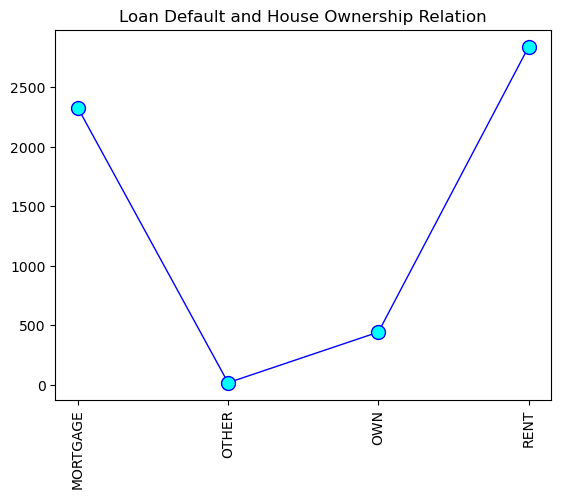

In [67]:
chargeoff_df=final_df[final_df["Loan_Status"]=="Charged Off"]
check4=chargeoff_df.groupby(['Home_Ownership']).count()

ax = plt.plot(check4["Final_Loan_Amt"], 'b-o', lw = 1, markersize = 10,  markerfacecolor='cyan')
plt.title("Loan Default and House Ownership Relation")
plt.xticks(rotation=90)
plt.show()

# Conclusion

### 1: We have found that the loan distribution is mostly concentrated to dept_Consolidation. So diversification is needed to reduce the risk of loan default sepcific to one category

### 2: Customer who has annual income less equal to 10 lakhs are more likly to default.

### 3: Similar to above conclusion persone with more experience are less likely to default as they earn more. This also can indicate the customer who recently have started working are taking loan to fullfill there needs without consideration there income.

### 4: Customer who leave on rent or has mortgage are more likely to default on loan